In [4]:
%run "docker_extract.py"
# import sys
# sys.path.insert(0, ".")

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipynb.fs.full.docker_extract import ExtractData 
from ipynb.fs.full.compute_statistics import Transformation 
# from docker_extract import ExtractData


parent_dir=os.path.dirname(os.getcwd())
data_extractor=ExtractData()
df=pd.read_csv(os.path.join(parent_dir,"test_dataframe.csv"),index_col=0)
old_cols=df.columns
df.dropna(how='all', axis=1, inplace=True)
df.drop(["match_id.1","has_stats"],axis=1,inplace=True)
df=df[df['outcome'] != "RET"]
df=df[(~df['surface'].isna()) | (~df['indoor'].isna())]
df.sort_values(by="date",inplace=True)


In [5]:
import numpy as np

print(df.shape)
data_trans = Transformation(df)
data_trans()
new_df=data_trans.get_dataframe()
print(new_df)
# new_df.to_csv('new_df.csv')
# print(new_df.shape)
# new_df.drop(['w_1st_in','l_1st_in','w_sv_gm_lset','l_sv_gm_lset','w_ace_set','l_ace_set','w_df_set','l_df_set','w_r_gm_w_set','l_r_gm_w_set','w_bp_set','l_bp_set','w_bpf_set','l_bpf_set'],axis=1,inplace=True)
# new_df=new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]
# new_df.dropna(inplace=True)
# new_df.sort_values(by=['date','match_id']).to_csv('stats_df.csv')
# display(new_df)

#sv is service--> Bal slaan
#sf is surface

(69594, 57)


 30%|███       | 6/20 [00:08<00:24,  1.77s/it]/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
100%|██████████| 20/20 [00:32<00:00,  1.62s/it]
/Users/gijs/Documents/Business_Analytics/Machine Learning/TennisML/data_extraction/compute_statistics.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_df['winner']=odds_df['winner'].map(lambda v: ' '.join(v.split(' ')[:-1]))
/Users/gijs/Documents/Business_Analytics/Machine Learning/TennisML/data_extraction/compute_statistics.py:432: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

       match_id  w_odds  l_odds  l_sf_elo  l_i_o_elo_rank  w_sf_elo  \
0         80931     NaN     NaN    2367.0          2367.0    1868.0   
1         80965     NaN     NaN    1796.0          1796.0    1903.0   
2         80966     NaN     NaN    1730.0          1730.0    1899.0   
3         80967     NaN     NaN    1800.0          1800.0    1864.0   
4         80968     NaN     NaN    1707.0          1707.0    1913.0   
...         ...     ...     ...       ...             ...       ...   
69314    177392     NaN     NaN    2159.0          2125.0    2363.0   
69315    177393     NaN     NaN    2204.0          2143.0    2363.0   
69316    177396     NaN     NaN    2204.0          2143.0    2159.0   
69317    177394     NaN     NaN    2159.0          2125.0    2273.0   
69318    177385     NaN     NaN    2425.0          2315.0    2250.0   

       w_i_o_elo_rank  winner_id  loser_id  w_rank  ...  w_r_game_w  \
0              1868.0       1723      1414    56.0  ...    0.125000   
1    

In [3]:
display(new_df[new_df['w_odds'].notna()])

,match_id,w_odds,l_odds,l_sf_elo,l_i_o_elo_rank,w_sf_elo,w_i_o_elo_rank,winner_id,loser_id,w_rank,...,w_r_game_w,l_r_game_w,w_gm_w,l_gm_w,w_g_dominance,l_g_dominance,w_br_ratio,l_br_ratio,w_win_p,l_win_p
30545,123044,2.200,1.615,1894.0,2075.0,1909.0,2004.0,2783,2562,23.0,...,0.375000,0.000000,0.705882,0.294118,0.000000,0.000000,0.375000,2.666667,0.395087,0.604913
30546,123045,1.100,6.500,1774.0,1792.0,2098.0,2082.0,2563,2809,7.0,...,0.444444,0.111111,0.666667,0.333333,4.000000,0.250000,0.800000,1.250000,0.848281,0.151719
30550,123049,2.625,1.444,1886.0,2075.0,1802.0,1893.0,2905,2845,41.0,...,0.444444,0.111111,0.666667,0.333333,4.000000,0.250000,2.000000,0.500000,0.274314,0.725686
30557,123041,1.444,2.625,2031.0,1945.0,2009.0,1972.0,2338,2035,6.0,...,0.300000,0.100000,0.600000,0.400000,3.000000,0.333333,0.300000,3.333333,0.607661,0.392339
30567,123054,1.533,2.375,1818.0,1832.0,1921.0,2043.0,2318,3285,21.0,...,0.181818,0.090909,0.545455,0.454545,2.000000,0.500000,1.555556,0.642857,0.774148,0.225852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69298,177359,1.660,2.100,2124.0,2065.0,1908.0,1936.0,50810,45105,44.0,...,0.333333,0.071429,0.620690,0.379310,4.666667,0.214286,3.888889,0.257143,0.380059,0.619941
69299,177357,1.530,2.370,1975.0,1930.0,2042.0,1976.0,5565,4752,74.0,...,0.384615,0.000000,0.692308,0.307692,0.000000,0.000000,0.000000,0.000000,0.537347,0.462653
69300,177356,1.220,4.000,1952.0,1929.0,1908.0,1936.0,50810,5166,44.0,...,0.200000,0.000000,0.619048,0.380952,0.000000,0.000000,0.000000,0.000000,0.543066,0.456934
69301,177355,1.400,2.750,2042.0,1976.0,1908.0,1936.0,50810,5565,44.0,...,0.125000,0.133333,0.483871,0.516129,0.937500,1.066667,1.000000,1.000000,0.468382,0.531618


In [4]:
display(new_df)

,match_id,w_odds,l_odds,l_sf_elo,l_i_o_elo_rank,w_sf_elo,w_i_o_elo_rank,winner_id,loser_id,w_rank,...,w_r_game_w,l_r_game_w,w_gm_w,l_gm_w,w_g_dominance,l_g_dominance,w_br_ratio,l_br_ratio,w_win_p,l_win_p
0,80931,NaN,NaN,2367.0,2367.0,1868.0,1868.0,1723,1414,56.0,...,0.125000,0.133333,0.483871,0.516129,0.937500,1.066667,0.500000,2.000000,0.053531,0.946469
1,80965,NaN,NaN,1796.0,1796.0,1903.0,1903.0,1439,857,70.0,...,0.461538,0.357143,0.555556,0.444444,1.292308,0.773810,1.320000,0.757576,0.649295,0.350705
2,80966,NaN,NaN,1730.0,1730.0,1899.0,1899.0,1735,1955,32.0,...,0.600000,0.300000,0.650000,0.350000,2.000000,0.500000,1.230769,0.812500,0.725686,0.274314
3,80967,NaN,NaN,1800.0,1800.0,1864.0,1864.0,1119,1532,83.0,...,0.444444,0.200000,0.631579,0.315789,2.222222,0.450000,3.250000,0.307692,0.591076,0.408924
4,80968,NaN,NaN,1707.0,1707.0,1913.0,1913.0,752,1601,79.0,...,0.500000,0.428571,0.535714,0.464286,1.166667,0.857143,0.583333,1.714286,0.765995,0.234005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69314,177392,NaN,NaN,2159.0,2125.0,2363.0,2217.0,4742,26577,2.0,...,0.285714,0.142857,0.571429,0.428571,2.000000,0.500000,0.750000,1.333333,0.806528,0.193472
69315,177393,NaN,NaN,2204.0,2143.0,2363.0,2217.0,4742,25897,2.0,...,0.222222,0.000000,0.631579,0.368421,0.000000,0.000000,0.400000,2.500000,0.771114,0.228886
69316,177396,NaN,NaN,2204.0,2143.0,2159.0,2125.0,26577,25897,6.0,...,0.142857,0.066667,0.551724,0.448276,2.142857,0.466667,0.222222,4.500000,0.451226,0.548774
69317,177394,NaN,NaN,2159.0,2125.0,2273.0,2139.0,6219,26577,3.0,...,0.066667,0.062500,0.516129,0.483871,1.066667,0.937500,0.750000,1.333333,0.581301,0.418699


_odds
             w_odds        l_odds
count  21784.000000  21784.000000
mean       1.823308      3.038126
std        0.930277      2.350008
min        1.000000      1.010000
25%        1.280000      1.660000
50%        1.530000      2.370000
75%        2.100000      3.500000
max       19.000000     51.000000


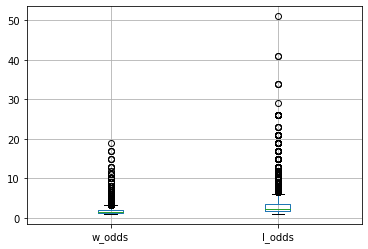


_sf_elo
           w_sf_elo      l_sf_elo
count  69319.000000  69319.000000
mean    1964.685281   1889.426333
std      168.230378    146.836087
min     1400.000000   1338.000000
25%     1852.000000   1793.000000
50%     1950.000000   1883.000000
75%     2060.000000   1978.000000
max     2666.000000   2670.000000


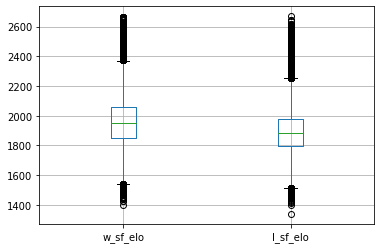


_i_o_elo_rank
       w_i_o_elo_rank  l_i_o_elo_rank
count    69319.000000    69319.000000
mean      1951.212366     1880.483807
std        161.213564      141.083309
min       1400.000000     1338.000000
25%       1843.000000     1786.000000
50%       1935.000000     1874.000000
75%       2045.000000     1965.000000
max       2618.000000     2605.000000


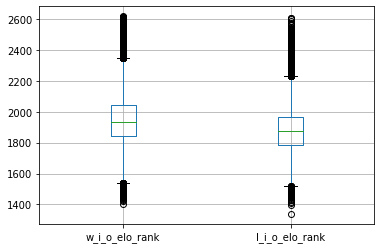


_rank
             w_rank        l_rank
count  69319.000000  69319.000000
mean      65.696808    101.090408
std       83.956497    135.938041
min        1.000000      1.000000
25%       20.000000     36.000000
50%       46.000000     68.000000
75%       84.000000    112.000000
max     1890.000000   2159.000000


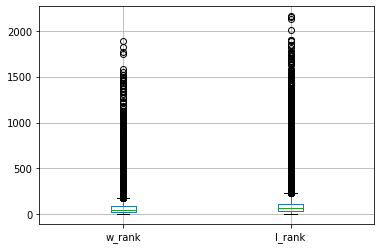


_elo_r
            w_elo_r       l_elo_r
count  69319.000000  69319.000000
mean    1956.375265   1886.787995
std      160.608264    141.733841
min     1400.000000   1338.000000
25%     1850.000000   1793.000000
50%     1942.000000   1881.000000
75%     2050.000000   1972.000000
max     2630.000000   2628.000000


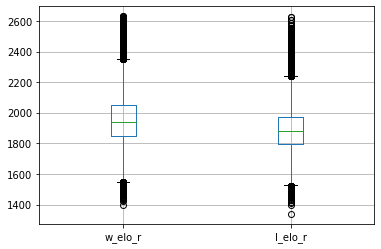


_ace
              w_ace         l_ace
count  69319.000000  69319.000000
mean       0.085196      0.057839
std        0.065836      0.048741
min        0.000000      0.000000
25%        0.036585      0.021277
50%        0.070707      0.047059
75%        0.118280      0.081395
max        0.567568      0.400000


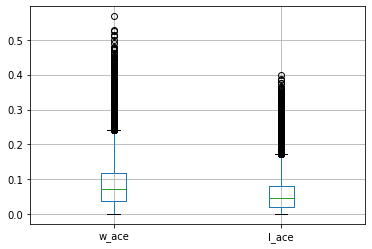


_df
               w_df          l_df
count  69319.000000  69319.000000
mean       0.034641      0.044694
std        0.026952      0.032078
min        0.000000      0.000000
25%        0.015873      0.020408
50%        0.030303      0.039216
75%        0.050000      0.062500
max        0.260274      0.354167


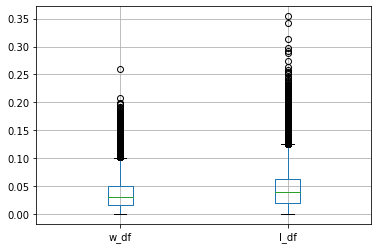


_tt_p
             w_tt_p        l_tt_p
count  69319.000000  69319.000000
mean       0.553940      0.446060
std        0.040600      0.040600
min        0.442922      0.172414
25%        0.524862      0.423729
50%        0.547445      0.452555
75%        0.576271      0.475138
max        0.827586      0.557078


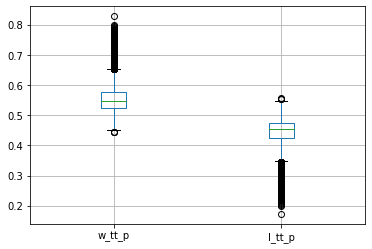


_sv_w
             w_sv_w        l_sv_w
count  69319.000000  69319.000000
mean       0.683098      0.569422
std        0.067739      0.075478
min        0.323944      0.142857
25%        0.636364      0.521739
50%        0.679487      0.573034
75%        0.727273      0.620000
max        1.000000      0.913043


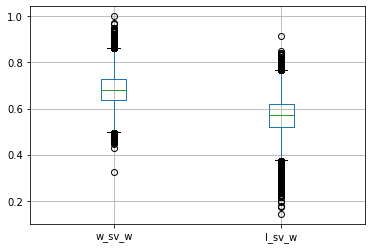


_1st_w
            w_1st_w       l_1st_w
count  69319.000000  69319.000000
mean       0.762950      0.656005
std        0.084174      0.098067
min        0.272727      0.055556
25%        0.704545      0.593750
50%        0.763158      0.659091
75%        0.821429      0.724138
max        1.000000      1.000000


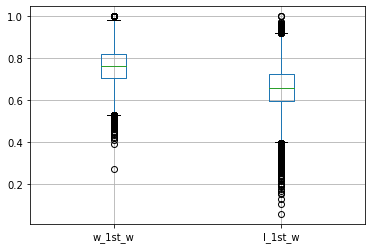


_2nd_w
            w_2nd_w       l_2nd_w
count  69319.000000  69319.000000
mean       0.563494      0.450339
std        0.105142      0.102958
min        0.000000      0.000000
25%        0.500000      0.384615
50%        0.558824      0.452830
75%        0.629630      0.518519
max        1.000000      0.941176


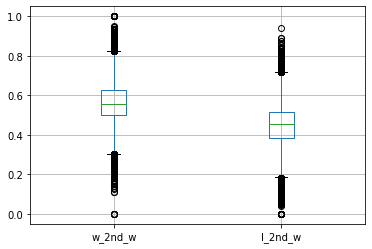


_bp_save
          w_bp_save     l_bp_save
count  69319.000000  69319.000000
mean       0.594972      0.500883
std        0.328451      0.203359
min        0.000000      0.000000
25%        0.444444      0.400000
50%        0.666667      0.500000
75%        0.833333      0.642857
max        1.000000      1.000000


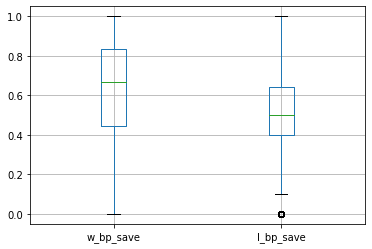


_r_1st_w
          w_r_1st_w     l_r_1st_w
count  69319.000000  69319.000000
mean       0.343995      0.237050
std        0.098067      0.084174
min        0.000000      0.000000
25%        0.275862      0.178571
50%        0.340909      0.236842
75%        0.406250      0.295455
max        0.944444      0.727273


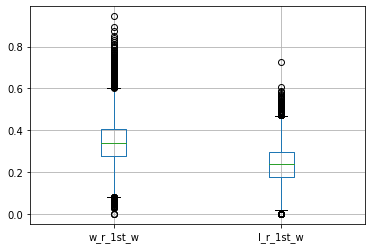


_bp_w
             w_bp_w        l_bp_w
count  69319.000000  69319.000000
mean       0.499117      0.405028
std        0.203359      0.328451
min        0.000000      0.000000
25%        0.357143      0.166667
50%        0.500000      0.333333
75%        0.600000      0.555556
max        1.000000      1.000000


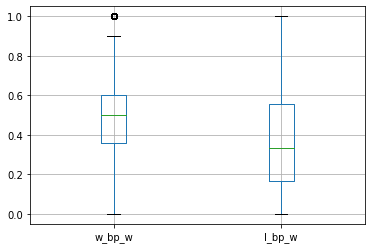


_rp_w
             w_rp_w        l_rp_w
count  69319.000000  69319.000000
mean       0.430578      0.316902
std        0.075478      0.067739
min        0.086957      0.000000
25%        0.380000      0.272727
50%        0.426966      0.320513
75%        0.478261      0.363636
max        0.857143      0.676056


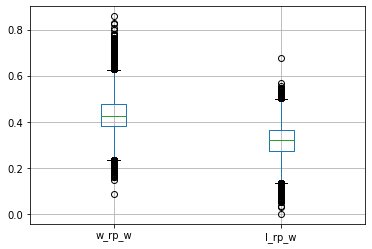


_p_dominance
       w_p_dominance  l_p_dominance
count   6.931900e+04   69319.000000
mean             inf       0.752883
std              NaN       0.181321
min     5.333333e-01       0.000000
25%     1.140508e+00       0.633638
50%     1.314286e+00       0.760870
75%     1.578187e+00       0.876802
max              inf       1.875000


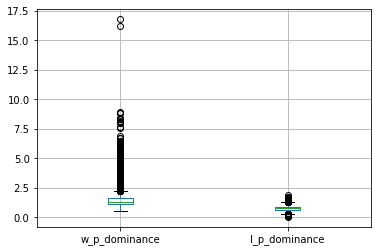


_ace_game
         w_ace_game    l_ace_game
count  69319.000000  69319.000000
mean       0.518077      0.376540
std        0.384064      0.312110
min        0.000000      0.000000
25%        0.222222      0.133333
50%        0.444444      0.307692
75%        0.727273      0.533333
max        2.933333      2.545455


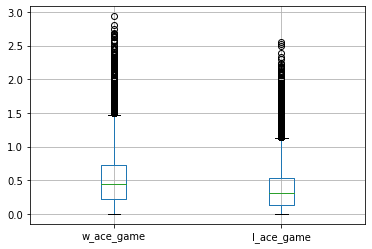


_df_game
          w_df_game     l_df_game
count  69319.000000  69319.000000
mean       0.218538      0.295197
std        0.174592      0.215141
min        0.000000      0.000000
25%        0.100000      0.125000
50%        0.200000      0.250000
75%        0.307692      0.400000
max        1.900000      2.428571


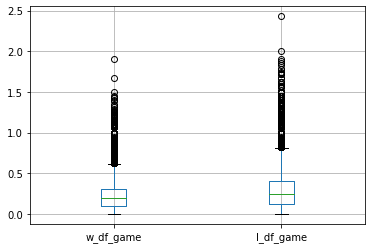


_df_2nd_sv
        w_df_2nd_sv   l_df_2nd_sv
count  69319.000000  69319.000000
mean       0.087671      0.107527
std        0.066403      0.073473
min        0.000000      0.000000
25%        0.041667      0.054054
50%        0.078947      0.096774
75%        0.125000      0.148148
max        1.000000      0.666667


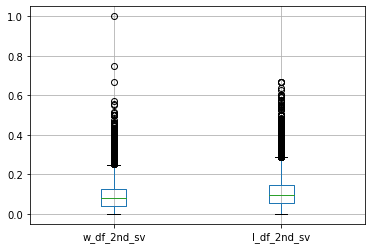


_ace_df_ratio
       w_ace_df_ratio  l_ace_df_ratio
count    69319.000000    69319.000000
mean         2.446790        1.621057
std          2.931425        2.131584
min          0.000000        0.000000
25%          0.500000        0.333333
50%          1.500000        1.000000
75%          3.250000        2.000000
max         43.000000       38.000000


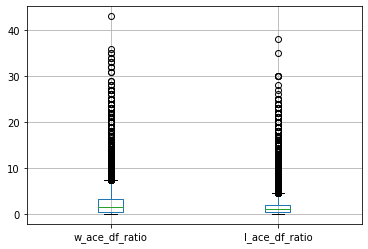


_1st_sv_eff
       w_1st_sv_eff  l_1st_sv_eff
count  6.931900e+04  6.931900e+04
mean            inf           inf
std             NaN           NaN
min    5.555556e-01  1.851852e-01
25%    1.187358e+00  1.237777e+00
50%    1.360490e+00  1.459784e+00
75%    1.565657e+00  1.741883e+00
max             inf           inf


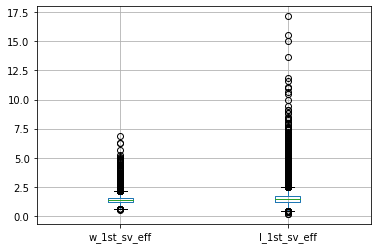


_sv_ip_w
          w_sv_ip_w     l_sv_ip_w
count  69319.000000  69319.000000
mean       0.639620      0.519562
std        0.073146      0.082520
min        0.323944      0.000000
25%        0.589474      0.470000
50%        0.636364      0.525000
75%        0.686808      0.575000
max        1.000000      0.909091


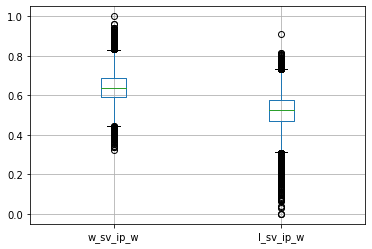


_ploss_game
       w_ploss_game  l_ploss_game
count  69319.000000  69319.000000
mean       2.012527      2.852028
std        0.611229      0.656594
min        0.000000      0.500000
25%        1.583333      2.400000
50%        2.000000      2.800000
75%        2.416667      3.250000
max        6.000000      7.000000


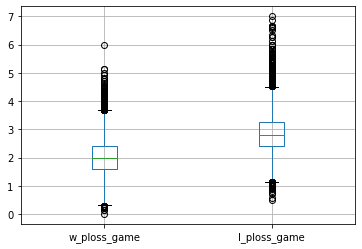


_bpf_game
         w_bpf_game    l_bpf_game
count  69319.000000  69319.000000
mean       0.405644      0.754521
std        0.282413      0.352434
min        0.000000      0.000000
25%        0.200000      0.500000
50%        0.375000      0.714286
75%        0.571429      1.000000
max        3.666667      3.285714


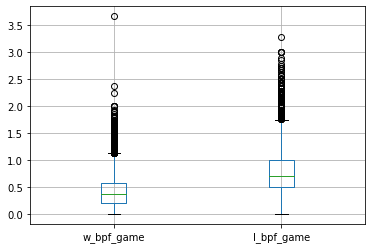


_svp_game
         w_svp_game    l_svp_game
count  69319.000000  69319.000000
mean       0.876436      0.649822
std        0.106815      0.168023
min        0.230769      0.000000
25%        0.800000      0.555556
50%        0.888889      0.666667
75%        1.000000      0.777778
max        1.000000      1.000000


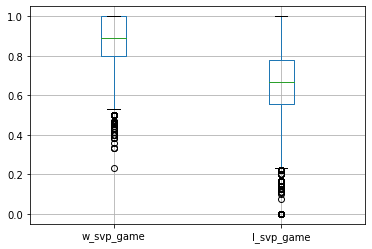


_r_ip_w
           w_r_ip_w      l_r_ip_w
count  69319.000000  69319.000000
mean       0.480438      0.360380
std        0.082520      0.073146
min        0.090909      0.000000
25%        0.425000      0.313192
50%        0.475000      0.363636
75%        0.530000      0.410526
max        1.000000      0.676056


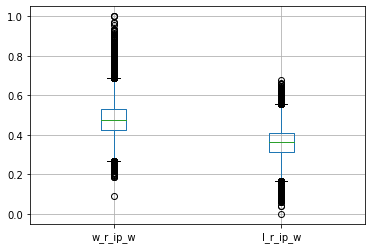


_pwon_r_game
       w_pwon_r_game  l_pwon_r_game
count   69319.000000   69319.000000
mean        2.852028       2.012527
std         0.656594       0.611229
min         0.500000       0.000000
25%         2.400000       1.583333
50%         2.800000       2.000000
75%         3.250000       2.416667
max         7.000000       6.000000


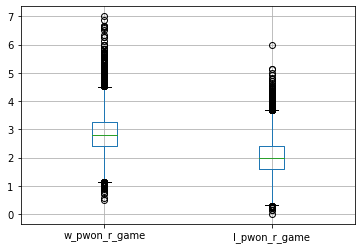


_bp_game
          w_bp_game     l_bp_game
count  69319.000000  69319.000000
mean       0.754521      0.405644
std        0.352434      0.282413
min        0.000000      0.000000
25%        0.500000      0.200000
50%        0.714286      0.375000
75%        1.000000      0.571429
max        3.285714      3.666667


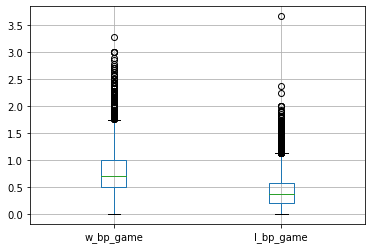


_r_game_w
         w_r_game_w    l_r_game_w
count  69319.000000  69319.000000
mean       0.350178      0.123564
std        0.168023      0.106815
min        0.000000      0.000000
25%        0.222222      0.000000
50%        0.333333      0.111111
75%        0.444444      0.200000
max        1.000000      0.769231


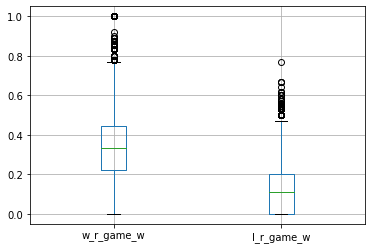


_gm_w
             w_gm_w        l_gm_w
count  69319.000000  69319.000000
mean       0.616102      0.384134
std        0.088671      0.088923
min        0.000000      0.000000
25%        0.545455      0.333333
50%        0.600000      0.400000
75%        0.666667      0.454545
max        1.000000      1.000000


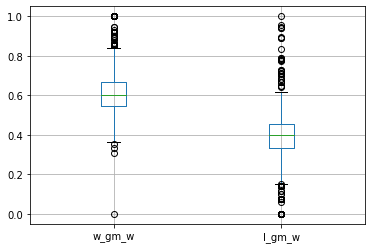


_g_dominance
       w_g_dominance  l_g_dominance
count   69319.000000   69319.000000
mean        1.703224       0.396346
std         1.498730       0.369293
min         0.000000       0.000000
25%         0.000000       0.000000
50%         1.500000       0.333333
75%         2.678571       0.606061
max         7.000000       4.000000


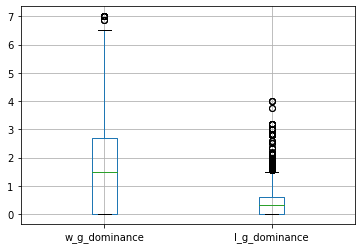


_br_ratio
         w_br_ratio    l_br_ratio
count  69319.000000  69319.000000
mean       1.155665      0.937613
std        1.176477      0.964768
min        0.000000      0.000000
25%        0.400000      0.312500
50%        0.892857      0.727273
75%        1.600000      1.300000
max       14.000000     17.000000


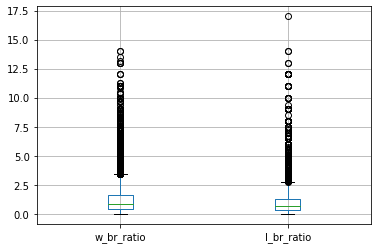


_win_p
            w_win_p       l_win_p
count  69319.000000  69319.000000
mean       0.581011      0.418989
std        0.202331      0.202331
min        0.010187      0.005624
25%        0.434185      0.259672
50%        0.593855      0.406145
75%        0.740328      0.565815
max        0.994376      0.989813


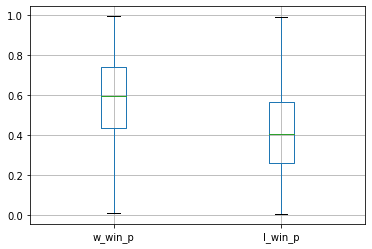

In [8]:
columns=[column[1:] for column in new_df.columns if "w_" in column]
for column in columns:
    print(column)
    print(new_df[['w'+column,'l'+column,]].describe())
    new_df.boxplot(['w'+column,'l'+column])
    plt.show()
    print()

In [6]:
print(new_df[new_df['w_br_ratio'].isna()][['w_br_ratio',]])
print(new_df.isna().sum().sort_values())

Empty DataFrame
Columns: [w_br_ratio]
Index: []
match_id           0
l_ace_game         0
w_df_game          0
l_df_game          0
w_df_2nd_sv        0
               ...  
w_sv_w             0
w_bp_save          0
l_win_p            0
l_odds         47535
w_odds         47535
Length: 70, dtype: int64


<AxesSubplot:>

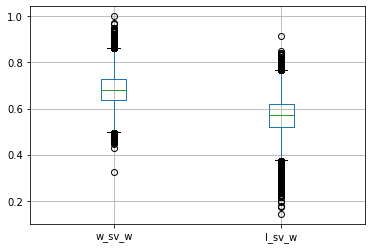

In [7]:
new_df.boxplot(['w_sv_w','l_sv_w'])

In [2]:
data_extractor.get_match_details(125282)

,name,outcome,match_id,date,first_name,last_name,first_name,last_name
0,Rotterdam,None,125282,2003-02-17,Sjeng,Schalken,Christophe,Rochus


In [9]:
import researchpy as rp

def ttest(column):
    return rp.ttest(group1=new_df["w"+column], group1_name= "Winner",
                    group2=new_df["l"+column], group2_name= "Loser")

In [10]:
columns=[column[1:] for column in new_df.columns if "w_" in column]

ttest_df=pd.DataFrame([])

for column in columns:
    data=[column[1:]]
    result=ttest(column)
    data.append(str(int(result[0]['N'][0])))
    data.append(str(round(result[0]['Mean'][0],2)))
    data.append(str(round(result[0]['Mean'][1],2)))
    data.append(str(round(result[1].iloc[0][1],2)))
    data.append(str(result[1].iloc[4][1]))
    data.append(str(result[1].iloc[5][1]))
    ttest_df=ttest_df.append(pd.Series(data),ignore_index=True)

ttest_df.columns=['Variable','N','Mean Winner','Mean Loser','Difference','Dif. < 0 p value','Dif. > 0 p value']
display(ttest_df)





/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.9/site-packages/researchpy/ttest.py:19: RuntimeWarning: invalid value encountered in double_scalars
  groups_diff = numpy.mean(group1) - numpy.mean(group2)
/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:5681: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2
/usr/local/lib/python3.9/site-packages/researchpy/ttest.py:36: RuntimeWarning: invalid value encountered in double_scalars
  d = (group1.mean() - group2.mean()) / numpy.sqrt(((group1.count() - 1) * group1.std()**2 + (group2.count() - 1) * group2.std()**2) / (group1.count() + group2.count() - 2))
/usr/local/lib/python3.9/site-packages/researchpy/ttest.py:40: RuntimeWarning: invalid value encountered in double_scalars
  cles = 0 - abs(group1.mean() - group2.mean()) / numpy.sqrt(group1.var() + group2.var())
/usr/local/l

,Variable,N,Mean Winner,Mean Loser,Difference,Dif. < 0 p value,Dif. > 0 p value
0,odds,21784,1.82,3.04,-1.21,0.0,1.0
1,sf_elo,69319,1964.69,1889.43,75.26,1.0,0.0
2,i_o_elo_rank,69319,1951.21,1880.48,70.73,1.0,0.0
3,rank,69319,65.7,101.09,-35.39,0.0,1.0
4,elo_r,69319,1956.38,1886.79,69.59,1.0,0.0
5,ace,69319,0.09,0.06,0.03,1.0,0.0
6,df,69319,0.03,0.04,-0.01,0.0,1.0
7,tt_p,69319,0.55,0.45,0.11,1.0,0.0
8,sv_w,69319,0.68,0.57,0.11,1.0,0.0
9,1st_w,69319,0.76,0.66,0.11,1.0,0.0


In [11]:
from scipy.stats import chi2_contingency
import seaborn as sns
from tqdm import tqdm
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in tqdm(factors_paired):
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    return chi2

new_df['label']=1
print(new_df['label'])
columns=[i for i in new_df.columns if "w_" in i]+['label']
chi_square=ch_calculate(new_df[columns])

0        1
1        1
2        1
3        1
4        1
        ..
69314    1
69315    1
69316    1
69317    1
69318    1
Name: label, Length: 69319, dtype: int64


 46%|████▌     | 530/1156 [10:07<40:39,  3.90s/it]  

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(chi_square,vmin=0, vmax=35000)
plt.show()

NameError: name 'plt' is not defined